In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
from lib import plot_decision_regions

## Training a Perceptron using scikit-learn

In [2]:
# Load Iris dataset
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
# select only 2 features: petal length and petal width
# feature matrix
X = iris.data[:, [2, 3]]
# target vector, species Setosa, Versicolor and Virginica stored
# as 0, 1, 2 respectively
y = iris.target

In [3]:
# Split into training and testing datasets
from sklearn.cross_validation import train_test_split
# randomly split X and y into 30% test and 70% training data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=0)

In [4]:
# Feature scaling for optimal performance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# estimate mean and std deviation of each feature dimension
# can be verified in sc.mean_ and sc.scale_ attributes
sc.fit(X_train)
# standardize features
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
# Train perceptron model
from sklearn.linear_model import Perceptron
# n_iter is the number of epochs, eta0 the learning rate
# random_state for reproducibility of the initial shuffling after
# each epoch
# experimentation is needed to find optimal learning rate
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [6]:
# predict classes of test samples and compare to
# their actual classes
y_pred = ppn.predict(X_test_std)
misclassified_samples = (y_test != y_pred).sum()
print('Misclassified samples: %d' % misclassified_samples)
misclassification_error = misclassified_samples/len(X_test)
print('Misclassification error: %.3f' % misclassification_error)
accuracy = 1 - misclassification_error
print('Accuracy: %.3f' % accuracy)

Misclassified samples: 4
Misclassification error: 0.089
Accuracy: 0.911


In [7]:
# accuracy metrics via sklearn
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


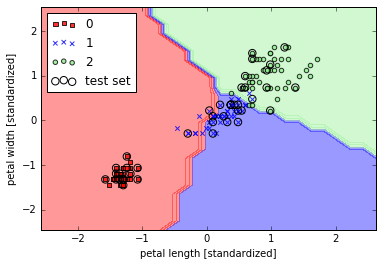

In [12]:
# Plot results
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                     y=y_combined,
                     classifier=ppn,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()
# the three classes cannot be separated perfectly by linear
# decision boundaries
# the perceptron never converges on datasets that are not linearly
# separable and is therefore not recommended in practice

## Class probabilities via logistic regression

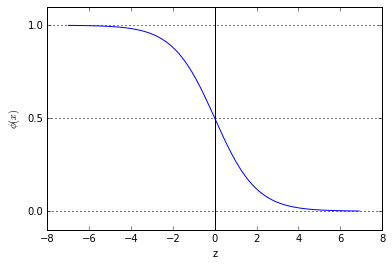

In [31]:
# plotting the sigmoid function
sigmoid = lambda z: 1.0/(1.0 + np.exp(z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (x)$')
plt.show()

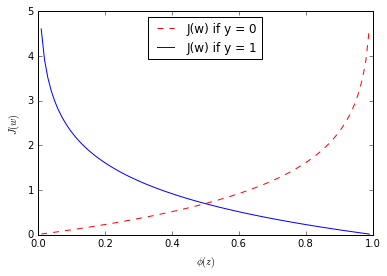

In [53]:
# cost function that needs to be minimized when training a
# logistic regression model
# this plots the function for one sample
# in training the cost is summed over all samples
def cost_fn(phi_z, y):
    return -y * np.log(phi_z) - (1-y) * np.log(1-phi_z)

phi_z = np.arange(0, 1, 0.01)
cost_y0 = cost_fn(phi_z, 0)
cost_y1 = cost_fn(phi_z, 1)
plt.plot(phi_z, cost_y0, color='r', 
         ls='dashed', label='J(w) if y = 0')
plt.plot(phi_z, cost_y1, color='b',
        label='J(w) if y = 1')
plt.xlabel('$\phi(z)$')
plt.ylabel('$J(w)$')
plt.legend(loc='upper center')
plt.show()

# the cost approaches 0 if we correctly predict that sample
# belong to class 1 (blue line). Cost approaches 0 if we
# correctly predict y = 0 (red dashed line). Cost approaches
# infinity in wrong predictions


### training linear regression with sklearn

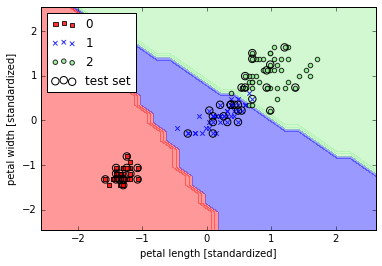

In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                     y_combined, classifier=lr,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [60]:
# predict class membership probability of first Setosa sample
prs = lr.predict_proba(X_test_std[0,:])
# 93.7% for veriscolor, 6.3% for virginica, 0% setosa
print(prs)

[[  2.05743774e-11   6.31620264e-02   9.36837974e-01]]


/home/ubuntu/workspace/venv/lib/python3.4/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
